# 서울시 유가 정보 분석

In [38]:
import pandas as pd
#파일합치기 
from glob import glob

In [54]:
station_files = glob("../Data/Oil/*.xls")
station_files

['../Data/Oil/지역_위치별(주유소) (1).xls',
 '../Data/Oil/지역_위치별(주유소) (10).xls',
 '../Data/Oil/지역_위치별(주유소) (11).xls',
 '../Data/Oil/지역_위치별(주유소) (12).xls',
 '../Data/Oil/지역_위치별(주유소) (13).xls',
 '../Data/Oil/지역_위치별(주유소) (14).xls',
 '../Data/Oil/지역_위치별(주유소) (15).xls',
 '../Data/Oil/지역_위치별(주유소) (16).xls',
 '../Data/Oil/지역_위치별(주유소) (17).xls',
 '../Data/Oil/지역_위치별(주유소) (18).xls',
 '../Data/Oil/지역_위치별(주유소) (19).xls',
 '../Data/Oil/지역_위치별(주유소) (2).xls',
 '../Data/Oil/지역_위치별(주유소) (20).xls',
 '../Data/Oil/지역_위치별(주유소) (21).xls',
 '../Data/Oil/지역_위치별(주유소) (22).xls',
 '../Data/Oil/지역_위치별(주유소) (23).xls',
 '../Data/Oil/지역_위치별(주유소) (24).xls',
 '../Data/Oil/지역_위치별(주유소) (3).xls',
 '../Data/Oil/지역_위치별(주유소) (4).xls',
 '../Data/Oil/지역_위치별(주유소) (5).xls',
 '../Data/Oil/지역_위치별(주유소) (6).xls',
 '../Data/Oil/지역

In [55]:
tmp_raw = []
for file_name in station_files:
    tmp = pd.read_excel(file_name,header=2)  # 2행은 헤더로 
    tmp_raw.append(tmp)

station_raw = pd.concat(tmp_raw)

In [56]:
station_raw

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,2145,2170,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,2183,2207,-
2,서울특별시,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),현대오일뱅크,02-3428-1739,Y,2305,2183,2199,-
3,서울특별시,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),SK에너지,02-484-6165,N,-,2210,2235,1600
4,서울특별시,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),GS칼텍스,02-441-3327,N,2355,2215,2239,1943
...,...,...,...,...,...,...,...,...,...,...
29,서울특별시,대청주유소,서울 강남구 개포로 654 (일원동),SK에너지,02-445-5500,N,2746,2566,2499,-
30,서울특별시,갤러리아주유소,서울 강남구 압구정로 426,SK에너지,02-540-4965,N,2790,2593,2540,1950
31,서울특별시,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,GS칼텍스,02-565-0267,N,2745,2595,2495,-
32,서울특별시,SK논현주유소,서울 강남구 논현로 747 (논현동),SK에너지,02-511-0955,N,2795,2598,2550,1840


In [57]:
len(station_raw)

456

In [58]:
station_raw.info()
# 고급휘발유 ~ 실내등유까지 가격이니 숫자로 반환 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 0 to 33
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      456 non-null    object
 1   상호      456 non-null    object
 2   주소      456 non-null    object
 3   상표      456 non-null    object
 4   전화번호    456 non-null    object
 5   셀프여부    456 non-null    object
 6   고급휘발유   456 non-null    object
 7   휘발유     456 non-null    object
 8   경유      456 non-null    object
 9   실내등유    456 non-null    object
dtypes: object(10)
memory usage: 39.2+ KB


In [59]:
# 필요 항목 발췌
stations = pd.DataFrame({'Oil_store':station_raw['상호'],
                         '주소':station_raw['주소'],
                         '가격':station_raw['휘발유'],
                         '셀프':station_raw['셀프여부'],
                         '상표':station_raw['상표']
})
stations.head()

,Oil_store,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),2145,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),2183,N,현대오일뱅크
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2183,Y,현대오일뱅크
3,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),2210,N,SK에너지
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),2215,N,GS칼텍스


In [60]:
# 주소의 서울 특별시를 서울로 변경하기 
stations['주소'] = stations['주소'].str.replace('서울특별시','서울')
stations.head()

,Oil_store,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울 강동구 천호대로 1246 (둔촌제2동),2145,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),2183,N,현대오일뱅크
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2183,Y,현대오일뱅크
3,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),2210,N,SK에너지
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),2215,N,GS칼텍스


In [61]:
# 주유소별 자치구 항목 추가
stations['주소'].iloc[0].split()[1]
stations['구'] = [region.split()[1] for region in stations['주소']]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울 강동구 천호대로 1246 (둔촌제2동),2145,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),2183,N,현대오일뱅크,강동구
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2183,Y,현대오일뱅크,강동구
3,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),2210,N,SK에너지,강동구
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),2215,N,GS칼텍스,강동구


In [62]:
stations['구'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [63]:
# 가격 정보가 '-'인곳 확인
stations[stations['가격'] == '-']

,Oil_store,주소,가격,셀프,상표,구
29,지에스칼텍스(주)내곡주유소,서울 서초구 헌릉로 210,-,N,GS칼텍스,서초구
27,한일주유소,서울 영등포구 도림로 486 (문래동3가),-,N,SK에너지,영등포구
11,북서울고속주유소,서울 강북구 삼양로 410 (수유동),-,Y,S-OIL,강북구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
8,현대오일뱅크㈜직영 재동주유소,서울 종로구 율곡로 58 (경운동),-,N,현대오일뱅크,종로구
10,지에스칼텍스(주)직영 역전점,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
14,대성산업(주)구의주유소,서울 광진구 광나루로 570 (구의동),-,N,GS칼텍스,광진구
15,지에스칼텍스 (주)구의스타주유소,서울 광진구 자양로 103,-,N,GS칼텍스,광진구
20,서서울고속주유소,서울 구로구 경인로 150 (오류동),-,N,GS칼텍스,구로구


In [64]:
# 여러개의 파일을 합하여 만든 데이터셋이기 때문에 index가 중복되어 있는것을 볼 수 있다.
stations[stations.index == 8]

,Oil_store,주소,가격,셀프,상표,구
8,sk해뜨는주유소,서울 강동구 상일로 132 (강일동),2245,Y,SK에너지,강동구
8,대성산업㈜청량리주유소,서울 동대문구 왕산로 289 (청량리동),2135,Y,GS칼텍스,동대문구
8,살피재주유소,서울 동작구 상도로 334,2265,N,SK에너지,동작구
8,에스오일(주) 염리동주유소,서울 마포구 백범로 126 (염리동),2245,Y,S-OIL,마포구
8,남정주유소,서울 서대문구 모래내로 243 (남가좌동),2158,N,GS칼텍스,서대문구
8,신반포주유소,서울 서초구 사평대로 94 (반포동),2168,Y,SK에너지,서초구
8,SK에너지(주) 성수주유소,서울 성동구 뚝섬로 352 (성수동1가),2199,N,SK에너지,성동구
8,우리주유소,서울 성북구 화랑로 292,2127,Y,SK에너지,성북구
8,상아주유소,서울 송파구 거마로 82,2153,Y,S-OIL,송파구
8,양천구주유소,서울 양천구 국회대로 275 (목동),2115,Y,알뜰주유소,양천구


In [65]:
# 인덱스 재배열 
stations.reset_index(drop = True , inplace=True)

In [66]:
# 인덱스 재배열 확인 
stations[stations.index == 8]

,Oil_store,주소,가격,셀프,상표,구
8,sk해뜨는주유소,서울 강동구 상일로 132 (강일동),2245,Y,SK에너지,강동구


In [67]:
# NaN값 확인
stations[stations['가격'].isnull()]

,Oil_store,주소,가격,셀프,상표,구


In [68]:
# '-' 인 데이터의 인덱스
removeIndex =  stations[stations['가격'] == '-'].index

In [69]:
# 인덱스 기준으로 drop
stations.drop(removeIndex, axis='index' , inplace=True)
len(stations)

447

In [70]:
# 지워진 것 확인
stations[stations['가격'] == '-']

,Oil_store,주소,가격,셀프,상표,구


In [71]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 455
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_store  447 non-null    object
 1   주소         447 non-null    object
 2   가격         447 non-null    object
 3   셀프         447 non-null    object
 4   상표         447 non-null    object
 5   구          447 non-null    object
dtypes: object(6)
memory usage: 24.4+ KB


In [72]:
# 가격 컬럼의 Type 변환 (object - > int)
stations = stations.astype({'가격':'int'})
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 455
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_store  447 non-null    object
 1   주소         447 non-null    object
 2   가격         447 non-null    int64 
 3   셀프         447 non-null    object
 4   상표         447 non-null    object
 5   구          447 non-null    object
dtypes: int64(1), object(5)
memory usage: 24.4+ KB


In [73]:
# 한글 폰트 문제 해결 
import matplotlib.pyplot as plt

# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

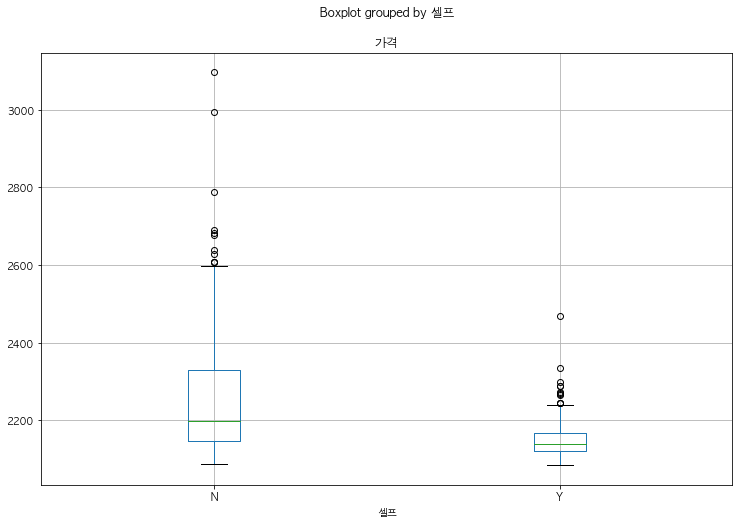

In [74]:
# boxplot 그리기
stations.boxplot( column='가격' , # y축 기준점
                by = '셀프', # x축
                figsize=(12,8)
             )
plt.show()

In [75]:
import seaborn as sns

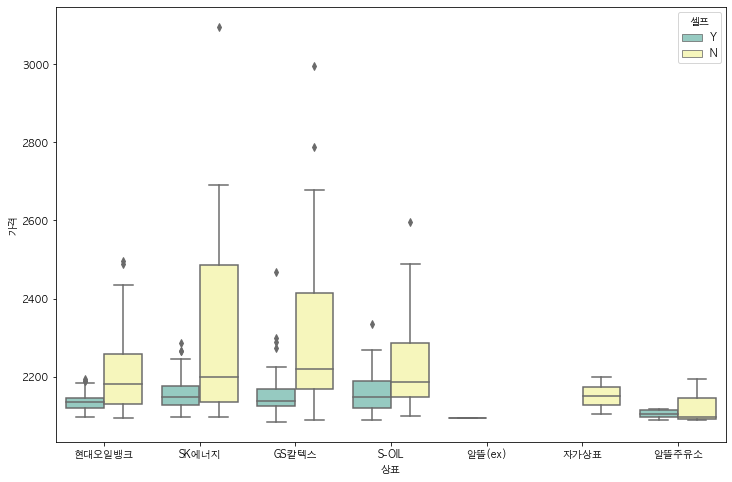

In [76]:
# 상표, 가격, 셀프 를 boxplot으로 그리기
plt.figure(figsize=(12,8))
sns.boxplot(
    x = '상표',
    y = '가격',
    hue = '셀프',
    data = stations,
    palette=  'Set3'
)
plt.show()

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


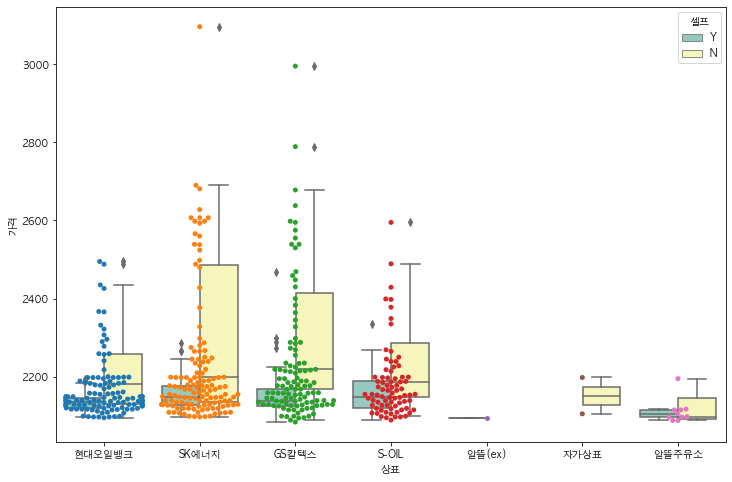

In [78]:
# 상표, 가격, 셀프 를 boxplot으로 그리기
plt.figure(figsize=(12,8))
sns.boxplot(
    x = '상표',
    y = '가격',
    hue = '셀프',
    data = stations,
    palette=  'Set3'
)
sns.swarmplot(
    x = '상표',
    y = '가격',
    data= stations
)

plt.show()

In [82]:
# 가격이 높은 순으로 정렬 (top10)
stations.sort_values('가격' , ascending = False).head(10)

,Oil_store,주소,가격,셀프,상표,구
282,서남주유소,서울 중구 통일로 30,3096,N,SK에너지,중구
246,서계주유소,서울 용산구 청파로 367 (청파동),2995,N,GS칼텍스,용산구
281,필동주유소,서울 중구 퇴계로 196 (필동2가),2789,N,GS칼텍스,중구
245,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2690,N,SK에너지,용산구
244,한석주유소,서울 용산구 이촌로 164,2681,N,SK에너지,용산구
280,약수주유소,서울 중구 다산로 173,2678,N,GS칼텍스,중구
455,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2638,N,GS칼텍스,강남구
243,(주)남경주유소,서울 용산구 녹사평대로11길 24,2628,N,SK에너지,용산구
242,에너비스,서울 용산구 한남대로 82 (한남동),2607,N,SK에너지,용산구
241,한남지점,서울 용산구 한남대로21길 4 (한남동),2607,N,SK에너지,용산구


In [84]:
# 가격이 낮은 순으로 정렬 (top10)
stations.sort_values(by = '가격' , ascending = True).head(10)

,Oil_store,주소,가격,셀프,상표,구
222,㈜지에스이앤알 미아주유소,서울 강북구 도봉로 122 (미아동),2084,Y,GS칼텍스,강북구
297,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2088,N,알뜰주유소,강서구
298,화곡역주유소,서울 강서구 강서로 154 (화곡동),2088,Y,알뜰주유소,강서구
169,지에스이앤알 직영 서울주유소,서울 양천구 신정로 236 (신정동),2089,N,GS칼텍스,양천구
170,현대주유소,서울 양천구 남부순환로 372 (신월동),2089,Y,S-OIL,양천구
223,수유동주유소,서울 강북구 도봉로 395 (수유동),2094,Y,GS칼텍스,강북구
194,(주)MS에너지,서울 영등포구 대림로 230,2095,N,현대오일뱅크,영등포구
380,대득에너지(금천셀프주유소),서울 금천구 시흥대로 81 (시흥동),2095,Y,GS칼텍스,금천구
68,만남의광장주유소,서울 서초구 양재대로12길 73-71,2095,Y,알뜰(ex),서초구
224,씨앤에스에너지㈜ 미아셀프주유소,서울 강북구 도봉로 200 (미아동),2095,Y,S-OIL,강북구


In [85]:
# 가장 비싼 가격과 싼 가격 차이
stations.가격.max() - stations.가격.min()

1012

In [92]:
import numpy as np

In [96]:
# 구별 가격 평균
gu_data = pd.pivot_table(stations , index=['구'] , values=['가격'] , aggfunc = np.mean)
gu_data.head()

,가격
구,
강남구,2335.882353
강동구,2240.000000
강북구,2117.363636
강서구,2170.375000
관악구,2170.571429


In [95]:
# 구별 가격 평균 높은순 top10
gu_data.sort_values('가격' , ascending = False).head(10)

,가격
구,
용산구,2544.769231
중구,2466.500000
종로구,2387.125000
강남구,2335.882353
강동구,2240.000000
성동구,2239.470588
서초구,2232.758621
마포구,2212.416667
영등포구,2184.185185


# 지도 표시

In [97]:
import json
import folium

In [100]:
geo_path = '../Data/skorea_municipalities_geo_simple.json' # 서울시 구 경계 데이터
geo_str = json.load(open(geo_path, encoding='utf8'))

map = folium.Map(
    location=[37.5502 , 126.982],
    zoom_start=10.5,
    tiles='Stamen Toner'
)
folium.Choropleth(
    geo_data=geo_str,
    data=gu_data,
    columns=[gu_data.index, '가격'],
    fill_color='PuRd',
    key_on='feature.id',
).add_to(map)

map

In [101]:
# 가격이 제일 비싼 Top10 구성
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10)
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구
282,서남주유소,서울 중구 통일로 30,3096,N,SK에너지,중구
246,서계주유소,서울 용산구 청파로 367 (청파동),2995,N,GS칼텍스,용산구
281,필동주유소,서울 중구 퇴계로 196 (필동2가),2789,N,GS칼텍스,중구
245,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2690,N,SK에너지,용산구
244,한석주유소,서울 용산구 이촌로 164,2681,N,SK에너지,용산구
280,약수주유소,서울 중구 다산로 173,2678,N,GS칼텍스,중구
455,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2638,N,GS칼텍스,강남구
243,(주)남경주유소,서울 용산구 녹사평대로11길 24,2628,N,SK에너지,용산구
242,에너비스,서울 용산구 한남대로 82 (한남동),2607,N,SK에너지,용산구
241,한남지점,서울 용산구 한남대로21길 4 (한남동),2607,N,SK에너지,용산구


In [102]:
# 가격이 제일 싼 Top10 구성
oil_price_bottom10 = stations.sort_values(by='가격', ascending=True).head(10)
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구
222,㈜지에스이앤알 미아주유소,서울 강북구 도봉로 122 (미아동),2084,Y,GS칼텍스,강북구
297,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2088,N,알뜰주유소,강서구
298,화곡역주유소,서울 강서구 강서로 154 (화곡동),2088,Y,알뜰주유소,강서구
169,지에스이앤알 직영 서울주유소,서울 양천구 신정로 236 (신정동),2089,N,GS칼텍스,양천구
170,현대주유소,서울 양천구 남부순환로 372 (신월동),2089,Y,S-OIL,양천구
223,수유동주유소,서울 강북구 도봉로 395 (수유동),2094,Y,GS칼텍스,강북구
194,(주)MS에너지,서울 영등포구 대림로 230,2095,N,현대오일뱅크,영등포구
380,대득에너지(금천셀프주유소),서울 금천구 시흥대로 81 (시흥동),2095,Y,GS칼텍스,금천구
68,만남의광장주유소,서울 서초구 양재대로12길 73-71,2095,Y,알뜰(ex),서초구
224,씨앤에스에너지㈜ 미아셀프주유소,서울 강북구 도봉로 200 (미아동),2095,Y,S-OIL,강북구


### 네이버 API이용해서 경도 위도 컬럼 추가하기

In [110]:
oil_price_top10['lng'] = 0
oil_price_top10['lat'] = 0
oil_price_bottom10['lat'] = 0
oil_price_bottom10['lng'] = 0

In [111]:
# top 10 위도 경도
# 네이버 API사용
# url 경로만 바꿔서 사용하면 될것임 
import urllib.request

# https://console.ncloud.com/naver-service/application 에서 클라이언트 아이디, 시크릿 값 가져오기 
client_id = "-"
client_secret = "-"

for i in range(len(oil_price_top10)):
    # txt = oil_price_top10.주소.iloc[i] # 값 확인
    encText = urllib.parse.quote(oil_price_top10.주소.iloc[i])
    url = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=" + encText # JSON
    request = urllib.request.Request(url)
    request.add_header("X-NCP-APIGW-API-KEY-ID", client_id)
    request.add_header("X-NCP-APIGW-API-KEY", client_secret)

    response = urllib.request.urlopen(request)
    rescode = response.getcode()

    if rescode == 200:
        response_body = response.read()
        enText = response_body.decode('utf-8')
    else:
        print("Error Code:" + rescode)

    data1 = json.loads(enText)

    oil_price_top10['lng'].iloc[i] = data1['addresses'][0]['x']
    oil_price_top10['lat'].iloc[i] = data1['addresses'][0]['y']

    # print(encText)
    # print(txt)

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [112]:
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구,lng,lat
282,서남주유소,서울 중구 통일로 30,3096,N,SK에너지,중구,126.9721764,37.5583881
246,서계주유소,서울 용산구 청파로 367 (청파동),2995,N,GS칼텍스,용산구,126.9689935,37.5523505
281,필동주유소,서울 중구 퇴계로 196 (필동2가),2789,N,GS칼텍스,중구,126.9936785,37.5609181
245,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2690,N,SK에너지,용산구,126.9724921,37.5502224
244,한석주유소,서울 용산구 이촌로 164,2681,N,SK에너지,용산구,126.9653682,37.5215820
280,약수주유소,서울 중구 다산로 173,2678,N,GS칼텍스,중구,127.0126262,37.5590707
455,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2638,N,GS칼텍스,강남구,127.0471387,37.5115603
243,(주)남경주유소,서울 용산구 녹사평대로11길 24,2628,N,SK에너지,용산구,126.9931989,37.5222584
242,에너비스,서울 용산구 한남대로 82 (한남동),2607,N,SK에너지,용산구,127.0061496,37.5360079
241,한남지점,서울 용산구 한남대로21길 4 (한남동),2607,N,SK에너지,용산구,127.0061196,37.5347069


In [113]:
# bottom 10 위도 경도
# 네이버 API사용
# url 경로만 바꿔서 사용하면 될것임 
import urllib.request

# https://console.ncloud.com/naver-service/application 에서 클라이언트 아이디, 시크릿 값 가져오기 
client_id = "-"
client_secret = "-"

for i in range(len(oil_price_bottom10)):
    encText = urllib.parse.quote(oil_price_bottom10.주소.iloc[i])
    url = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=" + encText # JSON
    request = urllib.request.Request(url)
    request.add_header("X-NCP-APIGW-API-KEY-ID", client_id)
    request.add_header("X-NCP-APIGW-API-KEY", client_secret)

    response = urllib.request.urlopen(request)
    rescode = response.getcode()

    if rescode == 200:
        response_body = response.read()
        enText = response_body.decode('utf-8')
    else:
        print("Error Code:" + rescode)

    data1 = json.loads(enText)

    oil_price_bottom10['lng'].iloc[i] = data1['addresses'][0]['x']
    oil_price_bottom10['lat'].iloc[i] = data1['addresses'][0]['y']


/Users/tj/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [114]:
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
222,㈜지에스이앤알 미아주유소,서울 강북구 도봉로 122 (미아동),2084,Y,GS칼텍스,강북구,37.6198926,127.0290662
297,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2088,N,알뜰주유소,강서구,37.5315671,126.8560525
298,화곡역주유소,서울 강서구 강서로 154 (화곡동),2088,Y,알뜰주유소,강서구,37.5407640,126.8414743
169,지에스이앤알 직영 서울주유소,서울 양천구 신정로 236 (신정동),2089,N,GS칼텍스,양천구,37.5106122,126.8476904
170,현대주유소,서울 양천구 남부순환로 372 (신월동),2089,Y,S-OIL,양천구,37.5339098,126.8291785
223,수유동주유소,서울 강북구 도봉로 395 (수유동),2094,Y,GS칼텍스,강북구,37.6422267,127.0295514
194,(주)MS에너지,서울 영등포구 대림로 230,2095,N,현대오일뱅크,영등포구,37.5013196,126.8975277
380,대득에너지(금천셀프주유소),서울 금천구 시흥대로 81 (시흥동),2095,Y,GS칼텍스,금천구,37.4413366,126.9030994
68,만남의광장주유소,서울 서초구 양재대로12길 73-71,2095,Y,알뜰(ex),서초구,37.4602299,127.0419172
224,씨앤에스에너지㈜ 미아셀프주유소,서울 강북구 도봉로 200 (미아동),2095,Y,S-OIL,강북구,37.6265323,127.0264497


---
> 강사님 방식

In [ ]:
# top 10 위도 경도
# 네이버 API사용
# url 경로만 바꿔서 사용하면 될것임 
import urllib.request

station_lng = []
station_lat = []

# https://console.ncloud.com/naver-service/application 에서 클라이언트 아이디, 시크릿 값 가져오기 
client_id = "-"
client_secret = "-"

for name in oil_price_top10['주소']:
    encText = urllib.parse.quote(name)
    url = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=" + encText # JSON
    request = urllib.request.Request(url)
    request.add_header("X-NCP-APIGW-API-KEY-ID", client_id)
    request.add_header("X-NCP-APIGW-API-KEY", client_secret)

    response = urllib.request.urlopen(request)
    rescode = response.getcode()

    if rescode == 200:
        response_body = response.read()
        enText = response_body.decode('utf-8')
    else:
        print("Error Code:" + rescode)

    data = json.loads(enText)
    lng = data['addresses'][0]['x']
    station_lng.append(lng)
    lat = data['addresses'][0]['y']
    station_lat.append(lat)


In [ ]:
oil_price_top10['lng'] = station_lng
oil_price_top10['lat'] = station_lat

> 강사님 방식 끝
---

In [133]:
geo_path = '../Data/skorea_municipalities_geo_simple.json' # 서울시 구 경계 데이터
geo_str = json.load(open(geo_path, encoding='utf8'))

map = folium.Map(
    location=[37.5502 , 126.982],
    zoom_start=10.5,
)
folium.Choropleth(
    geo_data=geo_str,
    data=gu_data,
    columns=[gu_data.index, '가격'],
    fill_color='RdPu',
    key_on='feature.id',
).add_to(map)

for i in range(len(oil_price_top10)):
    txt = '<h4>' + oil_price_top10['Oil_store'].iloc[i] + '</h4>'
    txt += '<p>가격 : ' + str(oil_price_top10.iloc[i]['가격']) + '원 </p>'

    popup = folium.Popup( txt ,min_width=100, max_width=100 )
    folium.Marker(location=[oil_price_top10.iloc[i]['lat'], oil_price_top10.iloc[i]['lng']], 
                popup=popup ,icon=folium.Icon(icon = 'flag',color = 'orange')).add_to(map)
                
for i in range(len(oil_price_bottom10)):
    txt = '<h4>' + oil_price_bottom10['Oil_store'].iloc[i] + '</h4>'
    txt += '<p>가격 : ' + str(oil_price_bottom10.iloc[i]['가격']) + '원 </p>'

    popup = folium.Popup( txt ,min_width=100, max_width=100 )
    folium.Marker(location=[oil_price_bottom10.iloc[i]['lat'], oil_price_bottom10.iloc[i]['lng']], 
                popup=popup ,icon=folium.Icon(icon = 'flag',color = 'cadetblue')).add_to(map)


map

---
# 스크레파이한 교촌치킨, 피자스쿨 지도에 표시하기

In [146]:
kyochon = pd.read_csv('../Data/Kyochon.csv')[:673]
kyochon.head()
len(kyochon)

673

In [149]:
kyochon['위도'] = 0
kyochon['경도'] = 0

In [152]:
# top 10 위도 경도
# 네이버 API사용
# url 경로만 바꿔서 사용하면 될것임 
import urllib.request

# https://console.ncloud.com/naver-service/application 에서 클라이언트 아이디, 시크릿 값 가져오기 
client_id = "f4ft1tc8ct"
client_secret = "5yOlZJYvYsVgJsLtvcdWWcjJUfGIY9TUFQZLLfeh"

for i , name in enumerate(kyochon['주소']):
    try:
        encText = urllib.parse.quote(name)
        url = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=" + encText # JSON
        request = urllib.request.Request(url)
        request.add_header("X-NCP-APIGW-API-KEY-ID", client_id)
        request.add_header("X-NCP-APIGW-API-KEY", client_secret)

        response = urllib.request.urlopen(request)
        rescode = response.getcode()

        if rescode == 200:
            response_body = response.read()
            enText = response_body.decode('utf-8')
        else:
            print("Error Code:" + rescode)

        data = json.loads(enText)

        kyochon['경도'].iloc[i] = data['addresses'][0]['x']
        kyochon['위도'].iloc[i] = data['addresses'][0]['y']
    except:
        pass


/Users/tj/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [154]:
len(kyochon[kyochon.위도 == 0])
# 20개 날라감 

20

In [151]:
for i , name in enumerate(kyochon['주소']):
    print(i , name)


0 충북 청주시 흥덕구 개신동 691
1 서울 송파구 가락동 75-7
2 경기 파주시 와동동 1557-1
3 서울 금천구 가산동 371-6 가산비지니스센터 2층
4 부산 부산진구 가야동 478
5 서울 강서구 등촌동 75-1
6 대전 동구 가오동 235-12
7 대전 서구 가장동 50-45
8 인천 서구 가정동 614-14
9 인천 서구 가좌동 30-78
10 경기 가평군 가평읍 대곡리 168-5
11 경남 진주시 호탄동 611-3
12 경북 영주시 가흥동 1881
13 인천 남동구 구월동 70-80
14 경기 평택시 갈곶리 239-48
15 대전 서구 갈마동 394-29
16 경기 구리시 갈매동 608-1 101호, 102호
17 인천 부평구 갈산동 55-8
18 경남 창원시 의창구 북면 감계리 246-4
19 부산 남구 감만1동 158-6
20 대구 달서구 감삼동 317-3
21 경기 용인시 기흥구 구갈동 594 강남피아
22 서울 서초구 서초동 1309-6
23 울산 북구 산하동 89
24 충북 청주시 흥덕구 가경동 1849
25 서울 강서구 화곡동 986-16
26 경기 고양시 일산동구 정발산동 687-5
27 서울 강동구 강일동 679-3 리슈빌오피스텔
28 충북 제천시 강제동 832
29 전남 강진군 강진읍 남성리 5-4
30 인천 강화군 강화읍 갑곳리 199-1
31 부산 부산진구 개금동 2-1
32 부산 부산진구 개금동 523-17
33 서울 구로구 개봉동 403-159
34 강원 원주시 개운동 395-23
35 서울 강남구 개포동 1229-18
36 서울 강남구 개포동 158-4
37 충북 충주시 교현동 173-11
38 경기 시흥시 거모동 1757-1
39 경기 시흥시 정왕동 2720-6
40 서울 송파구 가락동 180-9
41 부산 연제구 거제동 891-14
42 경남 거창군 거창읍 대동리 697-5
43 서울 광진구 화양동 9-18
44 제주 제주시 일도2동 160-9
45 인천 서구 검단로 왕길동 637-1
46 인천 서구 검암동 626

In [156]:
kyochon_f =  kyochon[kyochon.위도 != 0]

In [157]:
kyochon_f.to_csv('../Data/Kyochon_front.csv', index=False)

In [158]:
kyochon_front = pd.read_csv('../Data/Kyochon_front.csv')
kyochon_back = pd.read_csv('../Data/kyochon_back.csv')

print(kyochon_front.head())
print(kyochon_back.head())

    가맹점명                            주소         위도          경도
0   가락2호               서울 송파구 가락동 75-7  37.497009  127.120028
1   가람마을             경기 파주시 와동동 1557-1  37.734457  126.755333
2  가산디지털  서울 금천구 가산동 371-6 가산비지니스센터 2층  37.480200  126.881068
3     가야               부산 부산진구 가야동 478  35.147715  129.030712
4     가양               서울 강서구 등촌동 75-1  37.561262  126.853977
     가맹점명                           주소         위도          경도
0  송정(구미)  경북 구미시 송정동 38-5 우방타운 206동2호  36.121188  128.348261
1  송정(부산)            부산 해운대구 송정동 227-7  35.182210  129.203998
2    송정1호              광주 광산구 도산동 1143  35.129194  126.791736
3    송정지구                울산 북구 송정동 407  35.601450  129.362964
4      송천     전북 전주시 덕진구 송천동2가 179-116  35.866800  127.131046


In [183]:
pizza_front = pd.read_csv('../Data/pizzaschool_front.csv')
pizza_back = pd.read_csv('../Data/pizzaschool_back.csv')

print(pizza_front.head())
print(pizza_back.head())

  storename                                       address         위도  \
0      신당역점                         서울 중구 퇴계로86길 6 (신당동)   37.565274   
1     부산거제점                     부산 연제구 거제천로87번길 35 (거제동)   35.182588   
2     부산초량점                     부산 동구 고관로29번길 33 (초량동) 1층  35.122498   
3     대전문화점  대전 중구 계백로1716번길 87 (문화동, 센트럴파크3단지아파트) 상가 102  36.318563   
4     대전만년점                           대전 서구 만년남로 7 (만년동)   36.365862   

           경도  
0  127.019613  
1  129.071447  
2  129.040772  
3  127.412760  
4  127.376471  
    가맹점명                       주소         위도          경도
0  경복궁역점     서울 종로구 자하문로 19 (체부동)  37.577747  126.971807
1  동묘앞역점      서울 종로구 지봉로 50 (숭인동)  37.574511  127.015952
2    종로점      서울 종로구 삼봉로 81 (수송동)  37.572562  126.981506
3    약수점      서울 중구 다산로 136 (신당동)  37.555906  127.011535
4  상왕십리점  서울 성동구 왕십리로 357 (하왕십리동)  37.563835  127.030222


In [185]:
pizza_front.columns = ['가맹점명' ,'주소','위도','경도']

In [187]:
kyochon_map =  kyochon_front.append(kyochon_back)
pizza_map =  pizza_front.append(pizza_back)

In [194]:
map = folium.Map(
    location=[37.5502 , 126.982],
    zoom_start=10.5,
)

for i in range(len(kyochon_map)):
    txt = '<h4>'  +'교촌치킨' + '</h4>'
    txt += '<p>' + kyochon_map['가맹점명'].iloc[i] + '</p>'

    popup = folium.Popup( txt ,min_width=100, max_width=100 )
    folium.Marker(location=[kyochon_map.iloc[i]['위도'], kyochon_map.iloc[i]['경도']], 
                popup=popup ,icon=folium.Icon(icon = 'cutlery', prefix='fa' ,color = 'orange')).add_to(map)
                
for i in range(len(pizza_map)):
    txt = '<h4>' +'피자스쿨' + '</h4>'
    txt += '<p>'+ pizza_map['가맹점명'].iloc[i] + '</p>'

    popup = folium.Popup( txt ,min_width=100, max_width=100 )
    folium.Marker(location=[kyochon_map.iloc[i]['위도'], kyochon_map.iloc[i]['경도']], 
                popup=popup ,icon=folium.Icon(icon = 'adjust', prefix='fa',color = 'darkred')).add_to(map)

map.save('../Data/Kochon_Pizzaschool_map.html')
map

---